In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as scp
import matplotlib.ticker

from scipy import interpolate

In [48]:
function_01 = lambda x : 1/(1 + 25*x**2)
function_02 = lambda x : np.exp(np.cos(x))

In [49]:
# Wielomian interpolacyjny Lagrange'a 
def lagrange_interpolation(x_values, y_values, x):
    result = 0
    for j in range(len(x_values)):
        coefficient = 1
        for k in range(len(y_values)):
            if j != k:
                coefficient *= (x-x_values[k])/(x_values[j] - x_values[k])

        result += coefficient * y_values[j]

    return result

In [50]:
# Generowanie węzłów Czebyszewa
def get_chebyshev_points(n):
    return np.array([np.cos(np.pi*(2*i+1)/(2*n+2)) for i in range(n)])

In [51]:
# Transformacja węzłów czebyszewa na przedział [a,b]
def get_transformed_cebyshev_points(n, a, b):
    f = lambda x: a + (b-a) *(x+1) / 2
    return np.array([f(i) for i in n])

In [52]:
def lagrange_polynomial_with_chebyshev_nodes(function, n:int, a:int, b:int, points = None) -> tuple:
    interpolation_nodes = get_transformed_cebyshev_points(get_chebyshev_points(n), a, b)
    interpolation_values = np.array([function(interpolation_nodes[i]) for i in range(len(interpolation_nodes))])
    
    if points == None:
        points = np.array([a + i*(b-a)/(10*n-1) for i in range(n*10)])
         
    values = np.array([lagrange_interpolation(interpolation_nodes, interpolation_values, points[i]) for i in range(len(points))])
    
    return points, values

In [53]:
def lagrange_polynomial_with_equidistant_nodes(function, n:int, a:int, b:int, points = None) -> tuple:
    lagrange_interpolation_nodes = np.array([a + i * (b-a)/(n-1) for i in range(n)])
    lagrange_interpolation_values = np.array([function(lagrange_interpolation_nodes[i]) for i in range(n)])

    if points == None:
        points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
        
    values = np.array([lagrange_interpolation(lagrange_interpolation_nodes, lagrange_interpolation_values, points[i]) for i in range(len(points))])

    return points, values

In [54]:
def cubic_spine_functions(function, n:int, a:int, b:int, points = None) -> tuple:
    interpolation_nodes = np.array([a + i * (b-a)/(n-1) for i in range(n)])
    interpolation_values = np.array([function(interpolation_nodes[i]) for i in range(n)])
    
    tck = interpolate.splrep(interpolation_nodes, interpolation_values)
    
    if points == None:
        points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
    
    values = np.array([interpolate.splev(points[i], tck) for i in range(len(points))])
    
    return points, values

In [55]:
from matplotlib.ticker import FormatStrFormatter

def runge(function, n, a, b, title = ""):
    l1 = lagrange_polynomial_with_equidistant_nodes(function, n, a, b)
    l2 = cubic_spine_functions(function, n, a, b)
    l3 = lagrange_polynomial_with_chebyshev_nodes(function, n, a,b )
        
    plt.semilogy()
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(l1[0], l1[1], color='r', label="Wielomian Lagrange'a z równoodległymi węzłami")
    plt.plot(l2[0], l2[1], color='g', label="Kubiczne funkcje składane z równoodległymi węzłami")
    plt.plot(l3[0], l3[1], color='b', label="Wielomian Lagrange'a z węzłami Czebyszewa")
    
    points = np.array([a + i * (b-a)/(10*n-1) for i in range(10*n)])
    values = np.array([function(points[i]) for i in range(len(points))])    
    
    plt.plot(points, values, color='black', label="Wartość rzeczywista")

    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"{title}")
    plt.legend()
    

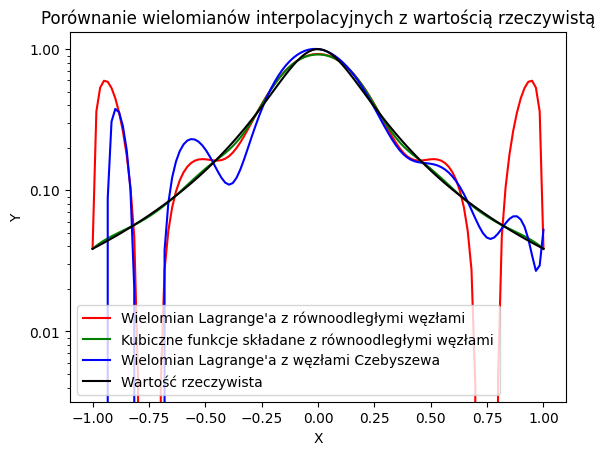

In [56]:
runge(function_01, 12, -1, 1, "Porównanie wielomianów interpolacyjnych z wartością rzeczywistą")

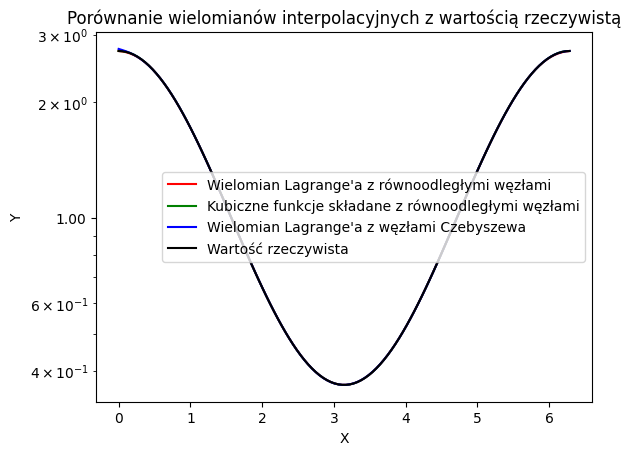

In [57]:
runge(function_02, 12, 0, 2*np.pi, "Porównanie wielomianów interpolacyjnych z wartością rzeczywistą")

In [58]:
# runge(function_01, 12, -1, 1)
# runge(function_02, 12, 0, 2*np.pi)

def test_function(function, a, b, title=""):
    sampl = sorted(np.random.uniform(low=a, high=b, size=(500,)))
    actual_values = np.array([function(i) for i in sampl])
    
    lagrange_equidistant = [lagrange_polynomial_with_equidistant_nodes(function, i, a, b, sampl)[1] for i in range(4, 51)]
    cubic_spine = [cubic_spine_functions(function, i, a, b, sampl)[1] for i in range(4, 51)]
    lagrange_chebyshev = [lagrange_polynomial_with_chebyshev_nodes(function, i, a, b, sampl)[1] for i in range(4, 51)]
        
    lagrange_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in lagrange_equidistant])
    cubic_spine_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in cubic_spine])
    lagrange_chebyshev_error = np.array([np.linalg.norm(np.absolute(np.array(i) - np.array(actual_values))) for i in lagrange_chebyshev])

    plt.semilogy()
    plt.plot([i for i in range(4, 51)], lagrange_error, color='r', label="Długość wektora dla interpolacji Lagrange'a") 
    plt.plot([i for i in range(4, 51)], cubic_spine_error, color='g', label="Długość wektora dla kubicznych funkcji sklejanych")
    plt.plot([i for i in range(4, 51)], lagrange_chebyshev_error, color='b',label="Długość wektora dla Lagrange'a z węzłami Czebyszewa")
    plt.xlabel("Ilość węzłów interpolacji")
    plt.ylabel("Norma wektora błędów")
    plt.title(f"{title}")
    plt.legend()

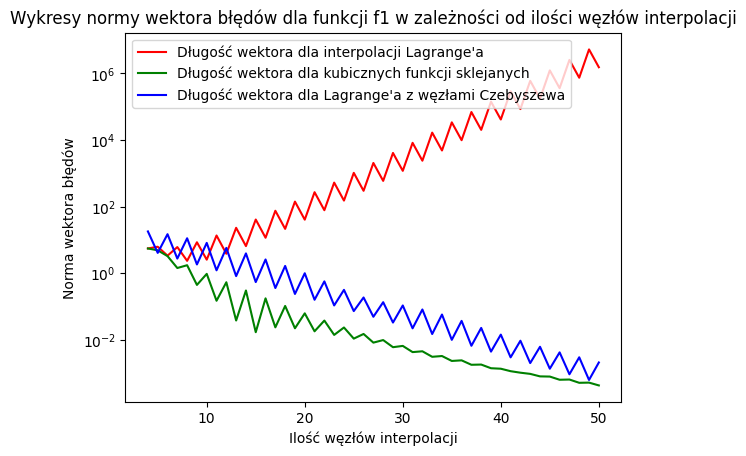

In [59]:
test_function(function_01, -1, 1, "Wykresy normy wektora błędów dla funkcji f1 w zależności od ilości węzłów interpolacji")

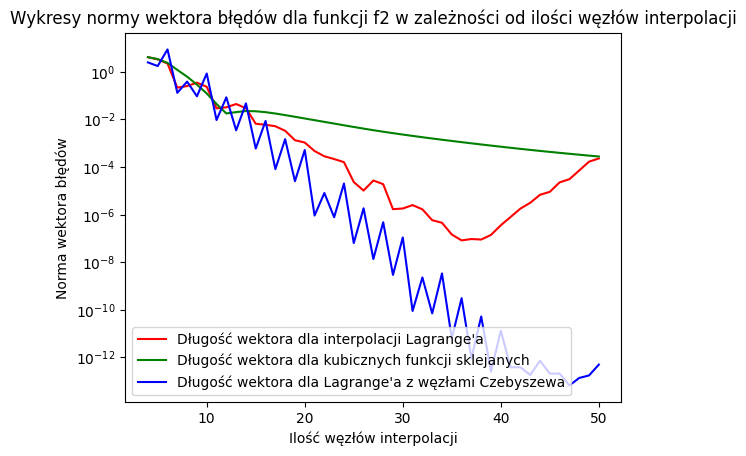

In [60]:
test_function(function_02, 0, 2*np.pi,  "Wykresy normy wektora błędów dla funkcji f2 w zależności od ilości węzłów interpolacji")